Here I'm repeating my analysis of the Identification Quality Experiment except with the non-blind identifications of [jrebman](https://www.inaturalist.org/people/jrebman), [naomibot](https://www.inaturalist.org/people/naomibot), and [kiermorse](https://www.inaturalist.org/people/keirmorse), all expert CA botanists who focus pretty exclusively on CA plants. This dataset is BY FAR dominated by Jon. I am also assuming these experts are not influenced by the opinions of others, i.e. they're going to call it like they see it no matter what others have said.

In [18]:
# First we'll get libraries imported and read in the data
import pandas as pd
df = pd.read_csv("identifications-ca-plant-experts-20191004.csv")
df

,taxon_id,taxon_name,taxon_iconic_taxon_name,taxon_rank,taxon_rank_level,taxon_ancestry,prev_obs_taxon_id,prev_obs_taxon_name,prev_obs_taxon_iconic_taxon_name,prev_obs_taxon_rank,prev_obs_taxon_rank_level,prev_obs_taxon_ancestry,obs_had_species_cid,more_conservative,disagreement,exact_agreement,more_specific_agreement
0,54453,Ferocactus cylindraceus,Plantae,species,10.0,48460/47126/211194/47125/47124/47366/47903/335...,54453,Ferocactus cylindraceus,Plantae,species,10.0,48460/47126/211194/47125/47124/47366/47903/335...,True,False,False,True,False
1,50164,Abronia villosa,Plantae,species,10.0,48460/47126/211194/47125/47124/47366/50256/50255,50164,Abronia villosa,Plantae,species,10.0,48460/47126/211194/47125/47124/47366/50256/50255,True,False,False,True,False
2,68205,Larrea tridentata,Plantae,species,10.0,48460/47126/211194/47125/47124/68220/68207/783...,68205,Larrea tridentata,Plantae,species,10.0,48460/47126/211194/47125/47124/68220/68207/783...,True,False,False,True,False
3,78754,Prunus fremontii,Plantae,species,10.0,48460/47126/211194/47125/47124/47132/47148/922...,78754,Prunus fremontii,Plantae,species,10.0,48460/47126/211194/47125/47124/47132/47148/922...,True,False,False,True,False
4,68191,Mammillaria dioica,Plantae,species,10.0,48460/47126/211194/47125/47124/47366/47903/335...,68191,Mammillaria dioica,Plantae,species,10.0,48460/47126/211194/47125/47124/47366/47903/335...,True,False,False,True,False
5,79137,Solanum elaeagnifolium,Plantae,species,10.0,48460/47126/211194/47125/47124/48515/48516/634...,79137,Solanum elaeagnifolium,Plantae,species,10.0,48460/47126/211194/47125/47124/48515/48516/634...,True,False,False,True,False
6,51305,Tamarix,Plantae,genus,20.0,48460/47126/211194/47125/47124/47366/51304,51305,Tamarix,Plantae,genus,20.0,48460/47126/211194/47125/47124/47366/51304,False,False,False,True,False
7,81059,Lupinus excubitus medius,Plantae,variety,5.0,48460/47126/211194/47125/47124/47123/47122/507...,47121,Lupinus,Plantae,genus,20.0,48460/47126/211194/47125/47124/47123/47122/507...,False,False,False,False,True
8,58160,Prosopis glandulosa,Plantae,species,10.0,48460/47126/211194/47125/47124/47123/47122/373...,58160,Prosopis glandulosa,Plantae,species,10.0,48460/47126/211194/47125/47124/47123/47122/373...,True,False,False,True,False
9,204306,Dysphania graveolens,Plantae,species,10.0,48460/47126/211194/47125/47124/47366/52327/518...,204306,Dysphania graveolens,Plantae,species,10.0,48460/47126/211194/47125/47124/47366/52327/518...,True,False,False,True,False


Each row is an identification where `taxon` is the taxon the expert ID'd the observation as, `prev_obs_taxon` is the taxon the observation was associated with before the expert added their ID. Some other explanations
* `obs_had_species_cid` means the observation had a Community Taxon before the expert contributed (e.g. the taxon was "confirmed")
* `more_conservative`: the expert added an ID of a taxon that was an ancestor of the existing taxon. Unfortunately, it's not clear whether this meant the expert disagreed that the evidence justified a more specific taxon or whether they were just adding their best guess
* `disagreement`: the expert's ID was not an ancestor or a descendant of the existing taxon, i.e. the existing taxon was wrong
* `exact_agreement`: the expert's ID exactly matched the existing taxon
* more_specific_agreement: the expert's ID was of a taxon that is contained by the existing taxon, e.g. the existing taxon was a species and the expert's ID was of a subspecies within that species

Here I'm mostly interested in the quality of our Research Grade observations, so I need to only look at records where the existing taxon was species or lower and the community had confirmed the existing taxon:

In [19]:
obs_was_confirmed = df.loc[(df['prev_obs_taxon_rank_level'] <= 10) & (df['obs_had_species_cid'])]

In [20]:
# Now I'l calculate some counts
more_conservative = len(obs_was_confirmed.loc[obs_was_confirmed['more_conservative']])
disagreements = len(obs_was_confirmed.loc[obs_was_confirmed['disagreement']])
exact_agreements = len(obs_was_confirmed.loc[obs_was_confirmed['exact_agreement']])
more_specific_agreements = len(obs_was_confirmed.loc[obs_was_confirmed['more_specific_agreement']])
total = len(obs_was_confirmed)
total

142997

In [21]:
# Percent accuracy
percent_accurate = round((exact_agreements + more_specific_agreements ) / total * 100, 2)
percent_accurate

94.68

In [22]:
# Percent inaccuracy
percent_inaccurate = round(disagreements / total * 100, 2)
percent_inaccurate

4.56

In [23]:
# Percent too specific (maybe, assuming identifiers were identifying as specific as they could, which may not be true)
percent_too_specific = round(more_conservative / total * 100, 2)
percent_too_specific

0.76

In [24]:
# Percent imprecision
percent_imprecise = round(more_specific_agreements / total * 100, 2)
percent_imprecise

2.49

Dang, these numbers are so different! Ok, let's get charting. First, a reality check: these really are botanists, right?

Text(0.5, 1.0, 'Total Expert Identifications By Iconic Taxon')

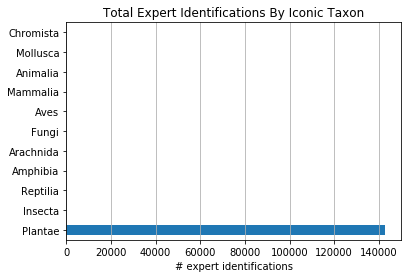

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

obs_was_confirmed['taxon_iconic_taxon_name'].value_counts().plot(kind="barh")
plt.xlabel('# expert identifications')
plt.grid(axis="x")
plt.title('Total Expert Identifications By Iconic Taxon')

K, definitely botanists. Now let's repeat that chart:

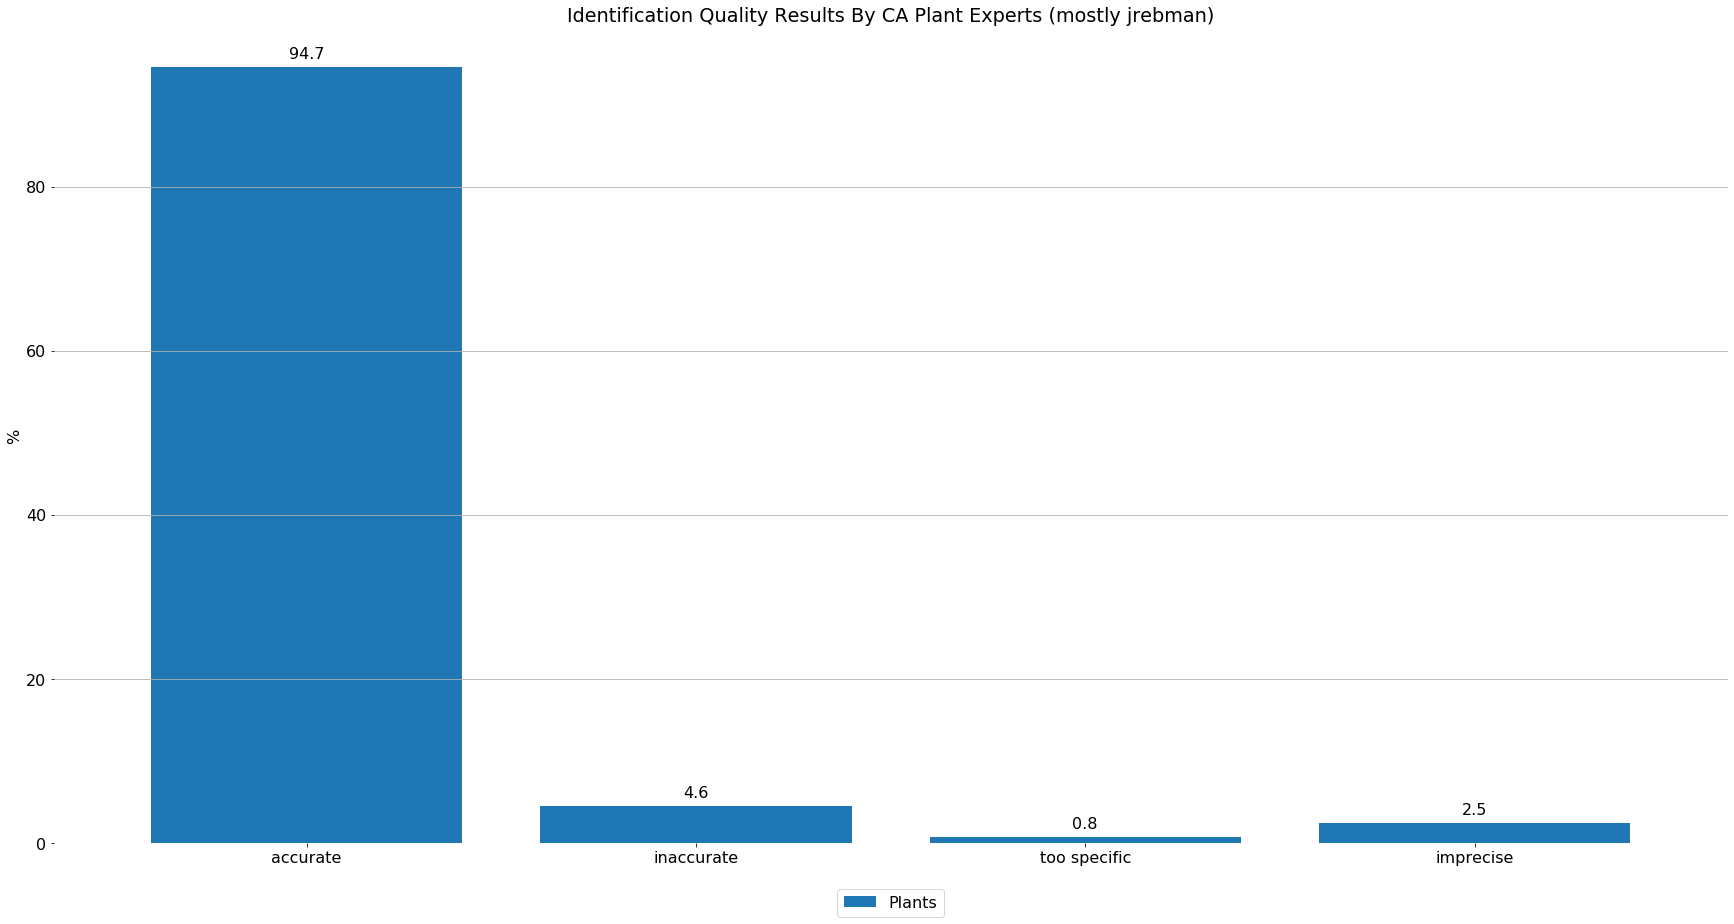

In [27]:
labels = ["accurate", "inaccurate", "too specific", "imprecise"]

# Labeling method from https://stackoverflow.com/a/48372659
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
def series_from_dataframe(df):
    total = len(df)
    more_conservative = len(df.loc[df['more_conservative']])
    disagreements = len(df.loc[df['disagreement']])
    exact_agreements = len(df.loc[df['exact_agreement']])
    more_specific_agreements = len(df.loc[df['more_specific_agreement']])
    percent_accurate = round((exact_agreements + more_specific_agreements ) / total * 100, 2)
    percent_inaccurate = round(disagreements / total * 100, 2)
    percent_too_specific = round(more_conservative / total * 100, 2)
    percent_imprecise = round(more_specific_agreements / total * 100, 2)
    return pd.Series([percent_accurate, percent_inaccurate, percent_too_specific, percent_imprecise])
series = series_from_dataframe(obs_was_confirmed)
df_by_iconic = pd.DataFrame({
    "Plants": series_from_dataframe(obs_was_confirmed.loc[obs_was_confirmed['taxon_iconic_taxon_name'] == 'Plantae'])
})
plt.rcParams.update({'font.size': 16})
ax = df_by_iconic.plot(kind='bar', figsize=(30, 15), colormap="tab20", width=0.8)
ax.set_xticklabels(labels, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
axes = plt.gca()
axes.set_ylim(0,100)
plt.grid(axis="y")
plt.ylabel('%')
plt.title('Identification Quality Results By CA Plant Experts (mostly jrebman)')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(df_by_iconic.columns))
add_value_labels(ax)

That's considerably more accurate than the baseline from the experiment two years ago. Hypothesis: jrebman identifies EVERYTHING. He doesn't pick and choose things that seem interesting or not, he just works through all the plants, so he isn't biased toward correcting observations that seem misidentified as the identifiers in the original experiment might have been.

Alternate hypothesis (proposed by someone after the talk where I presented these figures): Jon identifies observations from a pool of observations dominated by better-than-average observers and identifiers, e.g. [efmer](https://www.inaturalist.org/people/efmer), so his area of interest isn't representative of the data quality of iNat RG observaitons as a whole. Fair, but that was a known bias going into this more SoCal plant-focused version of the analysis. We should also consider that Jon has done a lot of work to create a community of expertise in his area of interest, i.e. a lot of these good observers and identifiers are good (or better than the iNat average) b/c Jon has taught them and encouraged them to use iNat.